<a href="https://colab.research.google.com/github/lostapple9/Machine-Learning-1/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG#forceEdit=true&sandboxMode=true&scrollTo=a_bM6nQ-PZBY

In [1]:
%tensorflow_version 2.x # this line is not required unless you are in a notebook
# tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# helper libraies
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into test and training

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0, 23, 23] # let's have a look at one pixel

194

In [5]:
train_labels[:10] #let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

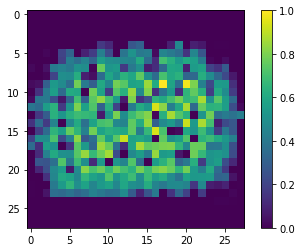

8
It is a/an Bag.


In [41]:
plt.figure()
plt.imshow(train_images[420])
plt.colorbar()
plt.grid(False)
plt.show()
print(train_labels[420])
print('It is a/an', class_names[train_labels[420]] + '.')

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)
                          keras.layers.Dense(128, activation='relu'), # hidden layer (2)
                          keras.layers.Dense(10, activation='softmax') # output layer (3)
                          ])

In [13]:
model.compile(
    optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy']
)

In [14]:
model.fit(train_images, train_labels, epochs=10) # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5037 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3811 - accuracy: 0.8629
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3410 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3160 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2984 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2719 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2516 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3222 - accuracy: 0.8864
Test accuracy:  0.8863999843597412


In [15]:
prediction = model.predict(test_images)

Ankle boot


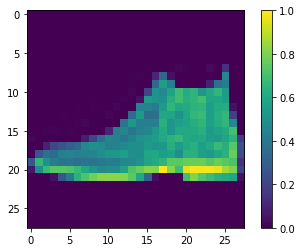

9
It is a/an Ankle boot.


In [66]:
print(class_names[np.argmax(prediction[0])])
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

print(test_labels[0])
print('It is a/an', class_names[test_labels[0]] + '.')

In [43]:
test_images.shape

(10000, 28, 28)

In [16]:
prediction[0]

array([1.6401013e-06, 4.2011184e-08, 9.9690711e-10, 1.1539653e-08,
       5.0155421e-08, 4.4806376e-03, 4.6692986e-07, 3.6668394e-02,
       1.6448563e-07, 9.5884860e-01], dtype=float32)

In [17]:
np.argmax(prediction[0])

9

In [18]:
test_labels[0]

9

Pick a number: 45


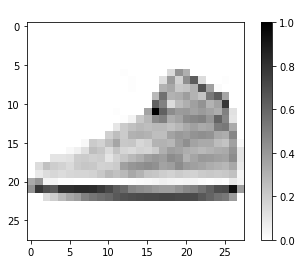

Excpected: Sneaker || Guess: Sneaker


In [61]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print('Excpected: ' + label, '|| Guess: ' + guess)

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")
      
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
